# *Tratamento dos dados*

## Análise geral

O dataset 'Mettalic glass forming' diz respeito a um dataset abordando 585 tipos distintos de vidros metálicos formados, juntamente a suas propriedades de análise em cada coluna. Para isso, as colunas de features e a coluna de target são definidas da seguinte maneira: 

- Features (X): representam propriedades gerais sobre cada tipo de vidro metálico no dataset. No entanto, está separado em duas etapas. A primeira parte diz respeito à composição do material como um todo, enquanto a segunda parte diz respeito apenas ao elemento químico predominante, em que está nomeado como 'Site1' nas colunas. 

- Target (y): representa a temperatura de transição vítrea reduzida.

Para o tratamento, importaremos as bibliotecas necessárias.

In [1]:
import pandas as pd
import pickle 
import chemparse 

In [2]:
# Obtendo o dataset original
metalic_glass = pd.read_csv('metalic_glass.csv', sep=',')

df = pd.DataFrame(metalic_glass)

df

,Material compositions,main_element,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,...,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
0,Ag10Cu35Zr55,Zr,0.534,0.579069,-0.585600,1.029882,1.029882,0.589536,0.217571,0.563915,...,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
1,Ag10Cu50Zr40,Cu,0.608,0.748401,-0.585600,1.029882,1.029882,1.176250,0.653969,0.563915,...,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
2,Ag10Cu55Zr35,Cu,0.609,0.804845,-0.585600,1.029882,1.029882,1.371822,0.799435,0.563915,...,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
3,Ag20Cu40Zr40,Cu,0.577,0.821973,-0.585600,1.029882,1.029882,1.176250,0.653969,0.563915,...,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
4,Ag35Ca65,Ca,0.515,-0.860992,-0.585600,-0.998961,-0.998961,-0.437214,-0.613663,-1.684370,...,1.005911,0.857849,-1.745035,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,Zr65Be35,Zr,0.503,-0.767293,-0.585600,-0.062572,-0.062572,-1.512857,-1.382555,0.563915,...,-1.122328,-1.165706,0.264503,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924
581,Zr66Al8Cu12Ni14,Zr,0.559,0.147353,0.045876,0.780178,0.780178,-0.368764,-0.426635,0.563915,...,-1.122328,0.857849,0.264503,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924
582,Zr66Al8Cu7Ni19,Zr,0.552,0.147072,0.045876,0.780178,0.780178,-0.417657,-0.447416,0.563915,...,-1.122328,0.857849,0.264503,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924
583,Zr66Al8Ni26,Zr,0.537,0.146678,0.045876,0.780178,0.780178,-0.486107,-0.476509,0.563915,...,-1.654388,-1.165706,-0.740266,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924


Acima temos o nosso dataset original com todas as colunas e dados contidos nele. Para o tratamento, optamos inicialmente manter apenas dados numéricos, então iremos retirar a coluna contendo as informações de 'main_element', uma vez que não iria trazer um maior peso para a previsão do target.

In [3]:
df_dropado = df.drop(['main_element'], axis=1)

## Análise estrutural

O dataframe possui uma dimensão de 585 linhas e 22 colunas (após a retirada da coluna de 'main element'), contando com features e o próprio target. É possível visualizar em:

In [4]:
print(f'Nós temos um total de {df_dropado.shape[0]} linhas e {df_dropado.shape[1]} colunas. Com isso, temos um total de {df_dropado.shape[0]*df_dropado.shape[1]} dados.')

Nós temos um total de 585 linhas e 22 colunas. Com isso, temos um total de 12870 dados.


As colunas com seus respectivos nomes podem ser visualizadas abaixo:

In [5]:
df_dropado.columns

Index(['Material compositions', 'Trg', 'Density_composition_average',
       'IsBoron_composition_average', 'IsDBlock_composition_average',
       'IsTransitionMetal_composition_average',
       'NdValence_composition_average', 'NValance_composition_average',
       'HeatVaporization_max_value', 'BoilingT_difference',
       'HeatVaporization_difference', 'MeltingT_difference',
       'NdValence_difference', 'NsUnfilled_difference', 'valence_difference',
       'Site1_Density', 'Site1_HeatCapacityMass', 'Site1_HeatFusion',
       'Site1_IsDBlock', 'Site1_IsTransitionMetal', 'Site1_NdValence',
       'Site1_SpecificHeatCapacity'],
      dtype='object')

Para este trabalho, optou-se que, caso existam dados 'not a number'(NaN), as linhas devem ser removidas para que não interfira na previsão dos dados durante o processo. Dessa maneira, utiliza-se o método 'dropna' para retirá-los, caso existam:

In [6]:
df_dropado.dropna(inplace=True)

E agora podemos verificar se existem dados desse caráter logo abaixo:

In [7]:
print(f'Nós temos {df_dropado.isna().sum().sum()} valores faltantes')

Nós temos 0 valores faltantes


## Conversão de string em novas colunas

Uma das principais colunas do dataset é descrito como 'Material compositions', em que nele obtém-se a identificação do material que está sendo analisado a partir da composição molar de cada elemento químico. No entanto, por ser uma informação importante, essa string necessita ser convertida em dados numéricos para utilizarmos na previsão. Por isso, cada string será separada em elementos com suas respectivas frações molares através da biblioteca _Chemparse_, e cada elemento se transformará em uma coluna, de modo que recebe a porcentagem referente à composição. Caso não exista determinado elemento na composição do material, será colocado um valor de zero.

In [8]:
# Modificando a coluna de composição do material

# Obtendo um dicionário contendo todos os elementos químicos de todo o dataset
elementos = set()
for composicao in df_dropado['Material compositions']:
    separacao = chemparse.parse_formula(composicao)
    elementos.update(separacao.keys())
     
lista_elementos = list(elementos)

# Criando colunas com cada elemento e inserindo 0 para todas as linhas 
for elemento in lista_elementos:
    df_dropado[elemento] = 0
    
# Obtendo os dicionários para cada string/linha do datset
dicionarios = []
for composicao in df_dropado['Material compositions']:
    separacao = chemparse.parse_formula(composicao)
    dicionarios.append(separacao)

# Atualizando os dados em suas respectivas linhas de cada material
for i in range(len(dicionarios)):
    for elemento, fracao in dicionarios[i].items():
        df_dropado[elemento][i] = fracao 


C:\Users\julia23006\AppData\Local\Temp\ipykernel_4696\338404419.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropado[elemento][i] = fracao


Com o novo dataframe, podemos retirar a coluna 'Material compositions', já que temos novas colunas já separadas para cada elemento:

In [9]:
df_final = df_dropado.drop('Material compositions', axis=1)

Assim, nosso dataframe final pode ser visto abaixo, com um total de 65 colunas.

In [10]:
df_final

,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,...,Ce,Mg,In,Fe,Pt,Pd,Er,P,Sm,Ti
0,0.534,0.579069,-0.585600,1.029882,1.029882,0.589536,0.217571,0.563915,0.544521,0.505748,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
1,0.608,0.748401,-0.585600,1.029882,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
2,0.609,0.804845,-0.585600,1.029882,1.029882,1.371822,0.799435,0.563915,0.544521,0.505748,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
3,0.577,0.821973,-0.585600,1.029882,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
4,0.515,-0.860992,-0.585600,-0.998961,-0.998961,-0.437214,-0.613663,-1.684370,-1.368929,-1.228445,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0.503,-0.767293,-0.585600,-0.062572,-0.062572,-1.512857,-1.382555,0.563915,0.168905,0.176059,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
581,0.559,0.147353,0.045876,0.780178,0.780178,-0.368764,-0.426635,0.563915,0.109147,0.220140,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
582,0.552,0.147072,0.045876,0.780178,0.780178,-0.417657,-0.447416,0.563915,0.109147,0.220140,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0
583,0.537,0.146678,0.045876,0.780178,0.780178,-0.486107,-0.476509,0.563915,0.109147,0.220140,...,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0


## Tipos dos dados

Com o dataframe tratado, é possível ver o tipo de dado para cada coluna, bem como também se existem dados não preenchidos.

In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Trg                                    585 non-null    float64
 1   Density_composition_average            585 non-null    float64
 2   IsBoron_composition_average            585 non-null    float64
 3   IsDBlock_composition_average           585 non-null    float64
 4   IsTransitionMetal_composition_average  585 non-null    float64
 5   NdValence_composition_average          585 non-null    float64
 6   NValance_composition_average           585 non-null    float64
 7   HeatVaporization_max_value             585 non-null    float64
 8   BoilingT_difference                    585 non-null    float64
 9   HeatVaporization_difference            585 non-null    float64
 10  MeltingT_difference                    585 non-null    float64
 11  NdVale

E, por fim, obtemos um resumo estatístico sobre cada coluna.

In [12]:
df_final.describe() 

,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,...,Ce,Mg,In,Fe,Pt,Pd,Er,P,Sm,Ti
count,585.000000,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,...,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,0.577388,1.709408e-12,3.589747e-11,1.367526e-11,1.367526e-11,-2.735041e-11,2.564101e-11,-1.709402e-10,-4.444445e-11,-4.273503e-11,...,0.919658,7.514359,0.011966,8.469744,0.273504,4.052650,0.136752,1.137607,0.170940,3.774735
std,0.048344,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,...,6.997948,18.555186,0.289414,21.873867,3.852756,16.031381,2.153788,4.138016,2.979067,10.883160
min,0.223000,-2.296437e+00,-5.856000e-01,-2.091415e+00,-2.091415e+00,-2.148464e+00,-1.922857e+00,-2.436709e+00,-2.118943e+00,-1.844594e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.557000,-6.580370e-01,-5.856000e-01,-1.155026e+00,-1.155026e+00,-8.435138e-01,-7.092550e-01,-7.405890e-01,-5.225718e-01,-7.852091e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.584000,1.412969e-01,-5.856000e-01,3.744096e-01,3.744096e-01,4.682513e-02,5.548036e-02,5.639150e-01,1.006106e-01,1.760586e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.609000,4.915096e-01,2.045356e-01,8.269977e-01,8.269977e-01,7.851073e-01,4.877221e-01,5.639150e-01,4.384218e-01,5.057478e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.688000,4.418691e+00,6.479041e+00,1.029882e+00,1.029882e+00,2.496357e+00,6.272280e+00,1.533032e+00,3.247621e+00,3.084747e+00,...,70.000000,90.000000,7.000000,91.000000,60.000000,95.000000,50.000000,22.500000,60.000000,65.000000


Para este trabalho, estaremos utilizando duas formas de dataset: uma em que contém as 65 colunas, com os elementos separados em colunas, e outra com 20 colunas, não contendo a composição do material. Isso será feito para analisarmos a diferença nas previsões

# *Análise exploratória*

## Gráfico de correlação

Para o início da análise exploratória, podemos aplicar o heatmap pela biblioteca seaborn para analisarmos a correlação entre as diferentes colunas presentes no dataset.

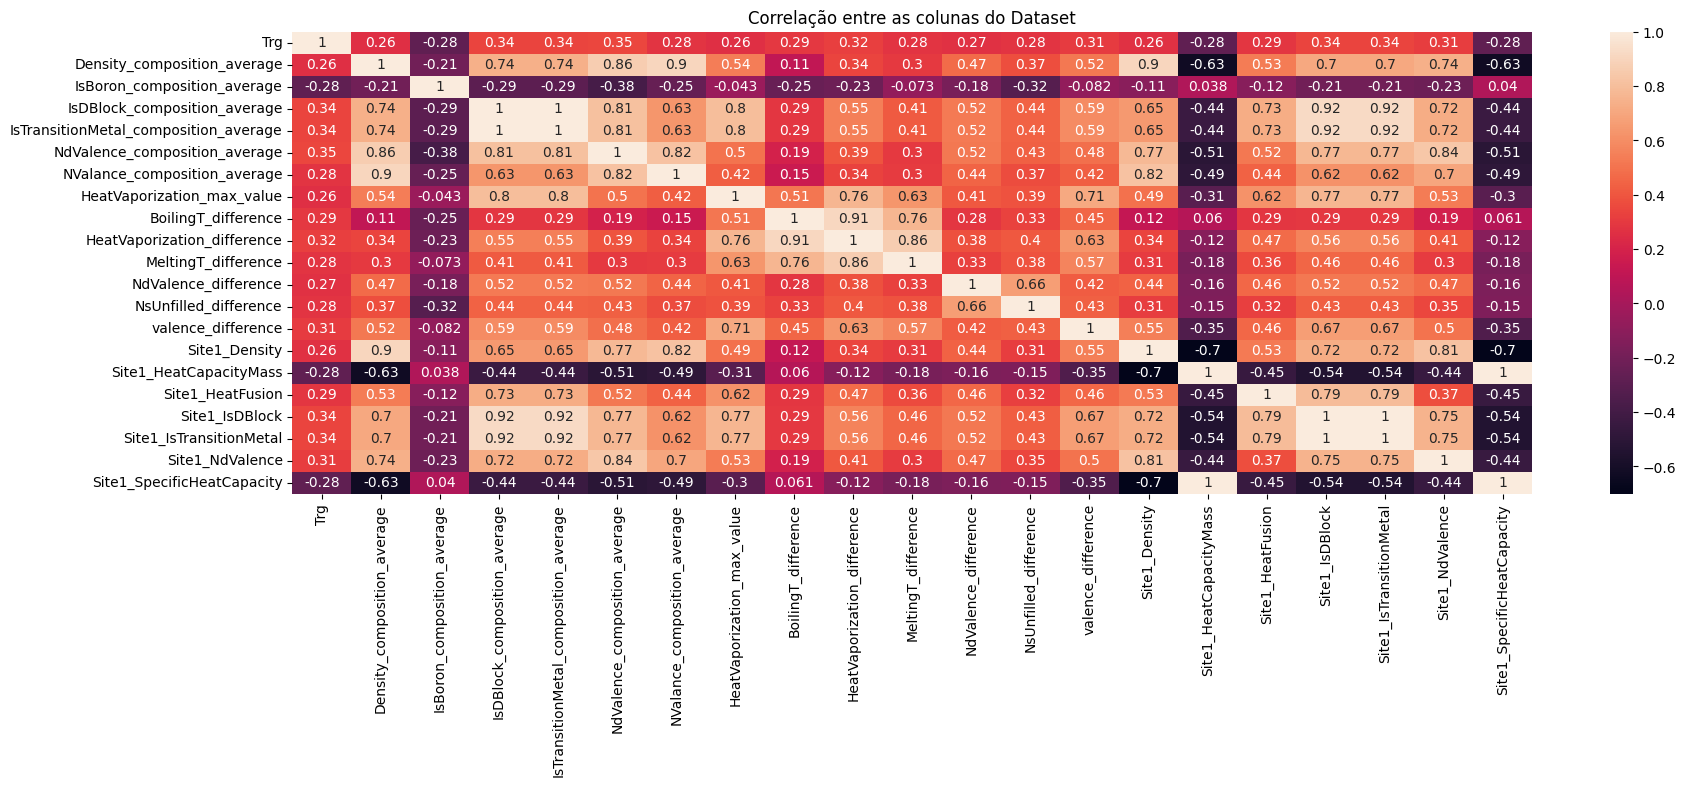

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Colunas de análise sem os elementos químicos
colunas_analise = ['Trg', 'Density_composition_average',
       'IsBoron_composition_average', 'IsDBlock_composition_average',
       'IsTransitionMetal_composition_average',
       'NdValence_composition_average', 'NValance_composition_average',
       'HeatVaporization_max_value', 'BoilingT_difference',
       'HeatVaporization_difference', 'MeltingT_difference',
       'NdValence_difference', 'NsUnfilled_difference', 'valence_difference',
       'Site1_Density', 'Site1_HeatCapacityMass', 'Site1_HeatFusion',
       'Site1_IsDBlock', 'Site1_IsTransitionMetal', 'Site1_NdValence',
       'Site1_SpecificHeatCapacity'] 
                   
df_heatmap = df_final[colunas_analise]
plt.figure(figsize=(20, 6))
sns.heatmap(df_heatmap.corr(), annot=True)
plt.title('Correlação entre as colunas do Dataset')
plt.show()

A partir desse mapa, é perceptível que determinadas informações são mais correlacionadas entre si. Com isso, implementando uma taxa de correlação igual ou acima de 0.75, destacam-se essencialmente essas comparações:

- Density_composition_average x NdValence_composition_average
- Density_composition_average x NValance_composition_average
- Density_composition_average x Site1_density
- IsDBlock_composition_average x NdValence_composition_average
- IsDBlock_composition_average x IsTransitionMaterial_composition_average
- IsDBlock_composition_average x Heatvaporization_max_value
- IsDBlock_composition_average x Site1_IsDBlock
- IsDBlock_composition_average x Site1_IsTransitionMetal
- IsTransitionMetal_composition_average x Site1_IsDBlock
- IsTransitionMetal_composition_average x Heatvaporization_max_value
- IsTransitionMetal_composition_average x Site1_IsTransitionMetal
- IsTransitionMetal_composition_average x NdValence_composition_average
- NdValence_composition_average x Site1_NdValence
- Nvalance_composition_average x Site1_Density
- Heatvaporization_max_value x HeatVaporization_difference








A visualização em forma de dataframe é vista abaixo:

In [14]:
correlacao = df_heatmap.corr()
correlacao

,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,...,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
Trg,1.000000,0.257989,-0.281368,0.339688,0.339688,0.346538,0.280972,0.262491,0.293743,0.321005,...,0.267369,0.277156,0.306609,0.263502,-0.277876,0.285701,0.340489,0.340489,0.310292,-0.277276
Density_composition_average,0.257989,1.000000,-0.208197,0.738236,0.738236,0.863275,0.904506,0.540333,0.108708,0.337456,...,0.472582,0.373357,0.521365,0.903062,-0.629285,0.533617,0.703783,0.703783,0.738851,-0.628878
IsBoron_composition_average,-0.281368,-0.208197,1.000000,-0.291911,-0.291911,-0.383197,-0.249421,-0.043343,-0.245972,-0.227183,...,-0.177537,-0.316900,-0.082199,-0.111626,0.038322,-0.120002,-0.207126,-0.207126,-0.228375,0.039656
IsDBlock_composition_average,0.339688,0.738236,-0.291911,1.000000,1.000000,0.809040,0.632189,0.795848,0.287584,0.547495,...,0.524742,0.437325,0.594836,0.646618,-0.440166,0.727301,0.921749,0.921749,0.722493,-0.437971
IsTransitionMetal_composition_average,0.339688,0.738236,-0.291911,1.000000,1.000000,0.809040,0.632189,0.795848,0.287584,0.547495,...,0.524742,0.437325,0.594836,0.646618,-0.440166,0.727301,0.921749,0.921749,0.722493,-0.437971
NdValence_composition_average,0.346538,0.863275,-0.383197,0.809040,0.809040,1.000000,0.815024,0.497164,0.191402,0.393167,...,0.519676,0.430684,0.482793,0.774490,-0.512358,0.521245,0.769268,0.769268,0.836425,-0.511385
NValance_composition_average,0.280972,0.904506,-0.249421,0.632189,0.632189,0.815024,1.000000,0.424009,0.147172,0.335809,...,0.442885,0.367123,0.422652,0.819504,-0.489987,0.440323,0.615981,0.615981,0.698733,-0.489458
HeatVaporization_max_value,0.262491,0.540333,-0.043343,0.795848,0.795848,0.497164,0.424009,1.000000,0.513221,0.763400,...,0.407278,0.387944,0.709155,0.489981,-0.305282,0.619476,0.767242,0.767242,0.529988,-0.303709
BoilingT_difference,0.293743,0.108708,-0.245972,0.287584,0.287584,0.191402,0.147172,0.513221,1.000000,0.909584,...,0.283407,0.330091,0.452413,0.119266,0.060441,0.285030,0.294333,0.294333,0.189740,0.060664
HeatVaporization_difference,0.321005,0.337456,-0.227183,0.547495,0.547495,0.393167,0.335809,0.763400,0.909584,1.000000,...,0.380768,0.404910,0.631991,0.338005,-0.118789,0.472245,0.558925,0.558925,0.406876,-0.117696


## Gráficos
### Histogramas

A partir do heatmap, verifica-se algumas possíveis correlações em valores mais próximos a 1. Dessa maneira, gráficos podem ser plotados para observarmos a distribuição dos dados. De início, vejamos a distribuição de frequência em histogramas:

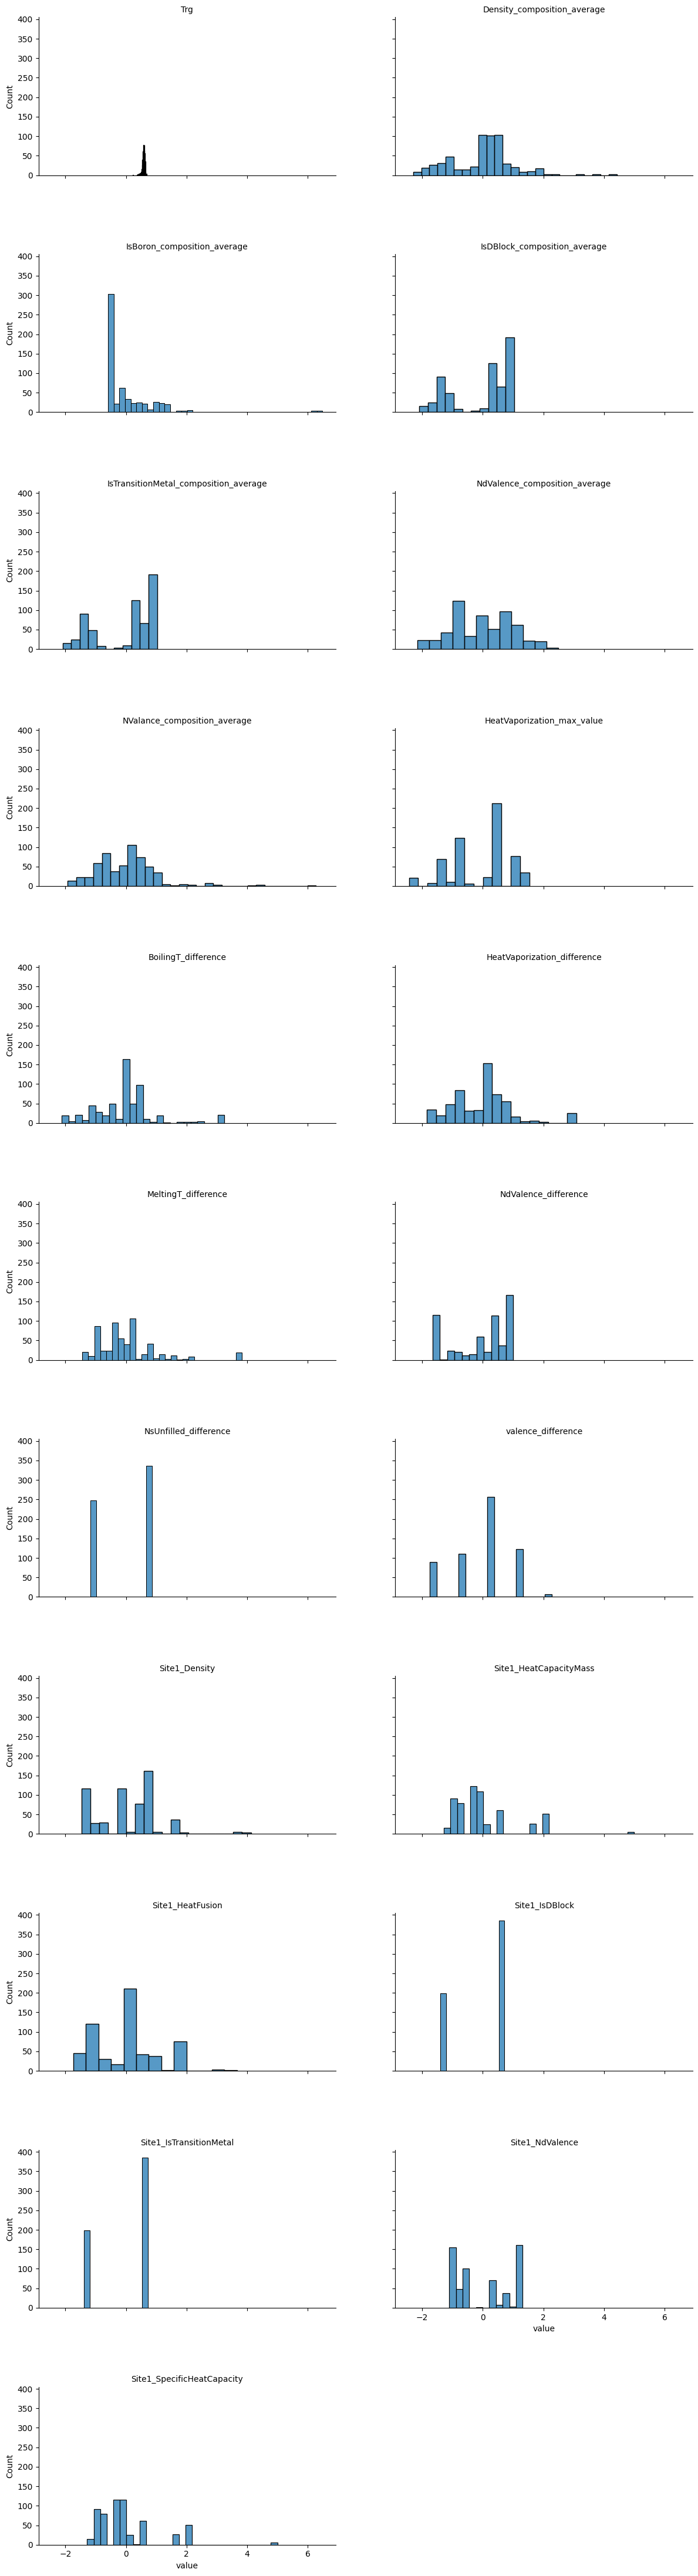

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Transformando o dataset para uma linha de dados
df_long = df_heatmap.melt(var_name='variable', value_name='value')

# Usando o facetgrid para a plotagem de múltiplos gráficos
g = sns.FacetGrid(df_long, col="variable", col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, "value")

# Removendo o nome 'variable'
g.set_titles(col_template="{col_name}")

# Ajustando o espaçamento
g.fig.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()


### Gráficos de correlação

Pelo heatmap, vê-se que algumas colunas possuem grande correlação entre si. Assim, os gráficos abaixos podem ser vistos obtendo uma tendência de linearidade entre os dados.

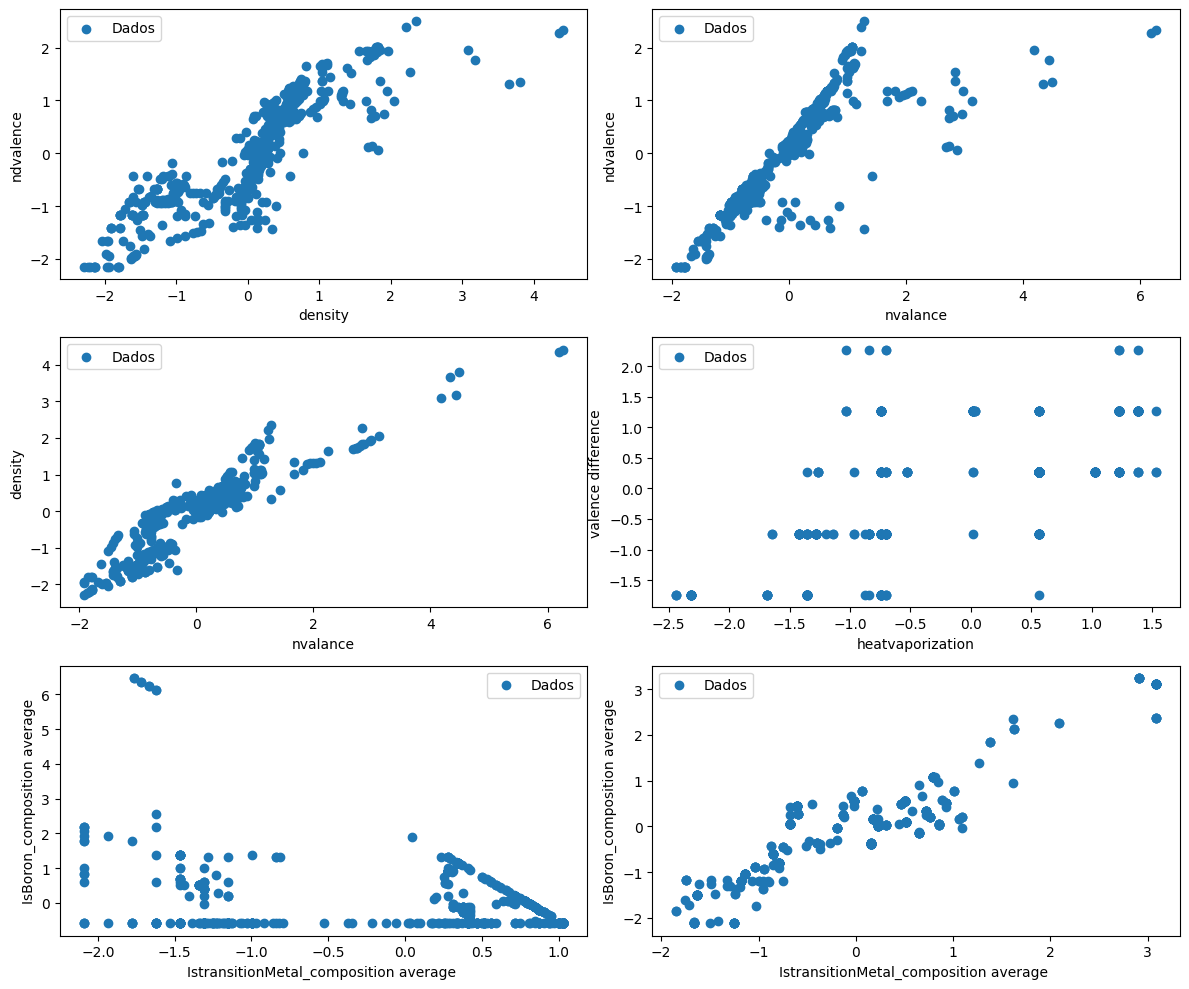

In [16]:
#Cria o eixo já para o multiplot na dimensão que desejamos
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

#gráfico 01
density = df_final['Density_composition_average']
ndvalence = df_final['NdValence_composition_average']
axs[0, 0].scatter(density, ndvalence, label='Dados')
axs[0, 0].set_xlabel('density')
axs[0, 0].set_ylabel('ndvalence')
axs[0, 0].legend()

#gráfico 02
nvalance = df_final['NValance_composition_average']
ndvalence = df_final['NdValence_composition_average']
axs[0, 1].scatter(nvalance, ndvalence, label='Dados')
axs[0, 1].set_xlabel('nvalance')
axs[0, 1].set_ylabel('ndvalence')
axs[0, 1].legend()

#gráfico 03
density = df_final['Density_composition_average']
nvalance = df_final['NValance_composition_average']
axs[1, 0].scatter(nvalance, density, label='Dados')
axs[1, 0].set_xlabel('nvalance')
axs[1, 0].set_ylabel('density')
axs[1, 0].legend()

#gráfico 04
heatvaporization = df_final['HeatVaporization_max_value']
valence_diff = df_final['valence_difference']
axs[1, 1].scatter(heatvaporization, valence_diff, label='Dados')
axs[1, 1].set_xlabel('heatvaporization')
axs[1, 1].set_ylabel('valence difference')
axs[1, 1].legend()

#gráfico 05
transition = df_final['IsTransitionMetal_composition_average']
isboron = df_final['IsBoron_composition_average']
axs[2, 0].scatter(transition, isboron, label='Dados')
axs[2, 0].set_xlabel('IstransitionMetal_composition average ')
axs[2, 0].set_ylabel('IsBoron_composition average')
axs[2, 0].legend()

#gráfico 06
heatvap_diff = df_final['HeatVaporization_difference']
bolling_diff = df_final['BoilingT_difference']
axs[2, 1].scatter(heatvap_diff, bolling_diff, label='Dados')
axs[2, 1].set_xlabel('IstransitionMetal_composition average ')
axs[2, 1].set_ylabel('IsBoron_composition average')
axs[2, 1].legend()

plt.tight_layout()
plt.show()


Essa plotagem nos permite visualizar um pouco melhor sobre a distribuição dos dados e a correlação entre eles, apresentando-nos certa linearidade em determinados casos (e outros nem tanto :D)